In [2]:
import os
import arviz as az
import xarray as xr
import pandas as pd
from iter0 import set_dir_moviedata
from simulation_test import make_consistent_title
import numpy as np
from imdb import Cinemagoer
# import os
# os.chdir(os.getcwd() + "/data/movie")
# test data: old_movie = pd.read_pickle('data/movie/old_movie.pkl')
set_dir_moviedata()
#make_consistent_title(frac =1)

In [22]:
iter0_nt

<xarray.Dataset>
Dimensions:    (index: 11578183)
Coordinates:
  * index      (index) int64 0 1 2 3 4 ... 11578179 11578180 11578181 11578182
Data variables:
    titleId    (index) object 'tt0000001' 'tt0000001' ... 'tt9916880'
    title      (index) object 'Carmencita' ... 'Horrid Henry Knows It All'
    year       (index) object '1894' '1894' '1894' ... '2015' '2015' '2014'
    region     (index) object 'DE' 'US' '\\N' '\\N' 'FR' ... nan 'DE' '\\N' nan
    titleType  (index) object 'short' 'short' 'short' ... 'short' 'tvEpisode'

In [23]:
iter1_mt

<xarray.Dataset>
Dimensions:    (index: 1206)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 ... 1200 1201 1202 1203 1204 1205
Data variables:
    old_id     (index) object 'OLD1633944' 'OLD549944' 'OLD2061021' ... nan nan
    title      (index) object "All's Well That Ends Well" ... 'Episode #3.6'
    year       (index) int64 1914 2010 2009 2012 2008 ... 2013 1983 2012 2019
    titleId    (index) object nan nan nan ... 'tt2324756' 'tt8881006'
    region     (index) object nan nan nan nan nan nan ... nan nan 'FI' '\\N' nan
    titleType  (index) object nan nan nan ... 'tvEpisode' 'short' 'tvEpisode'

In [31]:
xr.concat([iter0_nt.set_coords('titleId'), iter1_mt.set_coords('titleId')], dim = 'titleId')

ValueError: titleId already exists as coordinate or variable name.

In [21]:
xr.concat([iter0_nt, iter1_mt], dims = titleId)

NameError: name 'titleId' is not defined

In [19]:
iter1_mt = pd.read_pickle('iter1_merged_title.pkl').to_xarray()

In [12]:

# old_columns = ['title', 'year']
# new_columns = ['titleId', 'title', 'year', 'region', 'titleType']
#
# iter0_ot = pd.read_pickle('old_title.pkl').loc[:, old_columns].to_xarray()
# iter0_nt = pd.read_pickle('new_title.pkl').loc[:, new_columns].to_xarray()
#iter1_mt = pd.read_pickle('iter1_merged_title.pkl').to_xarray()
#iter0_ot_xr = iter0_ot.to_xarray()
#print(iter0_ot)
iter0_nt_stack_f = iter0_nt.stack(tyid = ['title', 'year'], create_index = False).set_coords
iter0_nt_stack_f

<xarray.Dataset>
Dimensions:    (index: 11578183)
Coordinates:
  * index      (index) int64 0 1 2 3 4 ... 11578179 11578180 11578181 11578182
Data variables:
    titleId    (index) object 'tt0000001' 'tt0000001' ... 'tt9916880'
    title      (index) object 'Carmencita' ... 'Horrid Henry Knows It All'
    year       (index) object '1894' '1894' '1894' ... '2015' '2015' '2014'
    region     (index) object 'DE' 'US' '\\N' '\\N' 'FR' ... nan 'DE' '\\N' nan
    titleType  (index) object 'short' 'short' 'short' ... 'short' 'tvEpisode'

In [14]:
iter0_nt_stack_f

<xarray.Dataset>
Dimensions:    (index: 11578183)
Coordinates:
  * index      (index) int64 0 1 2 3 4 ... 11578179 11578180 11578181 11578182
Data variables:
    titleId    (index) object 'tt0000001' 'tt0000001' ... 'tt9916880'
    title      (index) object 'Carmencita' ... 'Horrid Henry Knows It All'
    year       (index) object '1894' '1894' '1894' ... '2015' '2015' '2014'
    region     (index) object 'DE' 'US' '\\N' '\\N' 'FR' ... nan 'DE' '\\N' nan
    titleType  (index) object 'short' 'short' 'short' ... 'short' 'tvEpisode'

ITER0 COMPLETE                                                title    year
1633944                    All's Well That Ends Well  1914.0
549944                                  Trip to Town  2010.0
2061021  Jason Manford Live at the Manchester Apollo  2009.0
899167                                        (#1.1)  1981.0
727247                                 Skeleton Crew  2012.0
...                                              ...     ...
660158                              Who's Sorry Now?  1990.0
1722257                                 Chichi to ko  1983.0
1140121                                 (2010-07-07)  2010.0
102861                                     Hot Water  1997.0
1515842                            A magányos disznó  1992.0

[255 rows x 2 columns]             titleId                                      title  year region  \
10157032  tt7292756                              Episode #3.38  2001    NaN   
9990649   tt6988254                               Ostia antica  2015   

/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/movie/iter.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strong_eng'] = df.title.apply(lambda x: detect(x)) #"Anajigoku" pass iter2, fail iter3 (sw)
/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/movie/iter.py:75: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return df


1990


Empty DataFrame
Columns: [index, old_id, title, year, titleId, region, titleType, soft_eng]
Index: []
1984


Empty DataFrame
Columns: [index, old_id, title, year, titleId, region, titleType, soft_eng]
Index: []
1968


Empty DataFrame
Columns: [index, old_id, title, year, titleId, region, titleType, soft_eng]
Index: []
1991


Empty DataFrame
Columns: [index, old_id, title, year, titleId, region, titleType, soft_eng]
Index: []


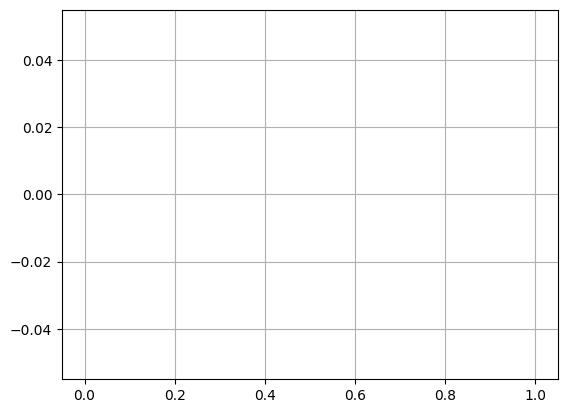

In [24]:
make_consistent_title(frac =.0001)

In [15]:
iter1_mt

NameError: name 'iter1_mt' is not defined

In [ ]:
xr.concat([iter1_mt])

In [21]:
print(iter0_ot.dims, iter0_nt.dims, iter1_mt.dims)

Frozen({'index': 2545531}) Frozen({'index': 11578183}) Frozen({'index': 1193})


In [17]:
iter1_mt

<xarray.Dataset>
Dimensions:    (index: 1193)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 ... 1187 1188 1189 1190 1191 1192
Data variables:
    old_id     (index) object 'OLD1932150' 'OLD2223598' 'OLD1346204' ... nan nan
    title      (index) object 'Fenêtre sur femmes' ... 'Episode #9.215'
    year       (index) int64 1992 1972 1956 2009 1982 ... 2008 2010 2018 2000
    titleId    (index) object nan nan nan ... 'tt9500470' 'tt12584708'
    region     (index) object nan nan nan nan nan nan ... 'MX' nan 'CH' nan nan
    titleType  (index) object nan nan nan ... 'movie' 'tvEpisode' 'tvEpisode'

In [10]:
idata = az.from_netcdf("sbc.nc")

In [11]:
idata.prior

<xarray.Dataset>
Dimensions:                (prior_draw: 10, pred_birth_frac_dim_0: 3, time: 40,
                            predator_dim_1: 3, prey_dim_1: 3)
Coordinates:
    chain                  (prior_draw) int64 ...
    draw                   (prior_draw) int64 ...
  * pred_birth_frac_dim_0  (pred_birth_frac_dim_0) int64 0 1 2
  * time                   (time) float64 0.01 0.135 0.26 ... 4.635 4.76 4.885
  * predator_dim_1         (predator_dim_1) int64 0 1 2
  * prey_dim_1             (prey_dim_1) int64 0 1 2
Dimensions without coordinates: prior_draw
Data variables:
    pred_birth_frac        (pred_birth_frac_dim_0, prior_draw) float64 ...
    prey_birth_frac        (prior_draw) float64 ...
    m_noise_scale          (prior_draw) float64 ...
    predator               (time, predator_dim_1, prior_draw) float64 ...
    prey                   (time, prey_dim_1, prior_draw) float64 ...
Attributes:
    created_at:                 2022-12-09T01:28:50.235777
    arviz_version:              0.15.0.dev0
    inference_library:          cmdstanpy
    inference_library_version:  1.0.8

In [14]:
iter0_ot_xr = iter0_ot.to_xarray()

In [15]:
iter0_ot

<xarray.Dataset>
Dimensions:  (index: 2545531)
Coordinates:
  * index    (index) int64 0 1 2 3 4 ... 2545526 2545527 2545528 2545529 2545530
Data variables:
    title    (index) object 'Cristián Campos' ... "Tomorrow's Youth"
    year     (index) float64 2.01e+03 2.013e+03 2.001e+03 ... nan nan 1.935e+03

In [12]:
iter0_nt.to_xarray().

,titleId,title,year,region,titleType
0,tt0000001,Carmencita,1894,DE,short
1,tt0000001,Carmencita,1894,US,short
2,tt0000001,Carmencita,1894,\N,short
3,tt0000002,Le clown et ses chiens,1892,\N,short
4,tt0000002,Le clown et ses chiens,1892,FR,short
...,...,...,...,...,...
11578178,tt9916850,Episode #3.19,2010,NaN,tvEpisode
11578179,tt9916852,Episode #3.20,2010,NaN,tvEpisode
11578180,tt9916856,The Wind,2015,DE,short
11578181,tt9916856,The Wind,2015,\N,short


In [13]:
iter0_nt_id = iter0_nt.to_xarray().from_nectcdf()
#iter1_mt_xr = iter1_mt.to_xarray()

AttributeError: 'Dataset' object has no attribute 'from_nectcdf'

In [16]:
iter0_nt_xr

NameError: name 'iter0_nt_xr' is not defined

In [9]:
iter1_mt_xr.from_

<xarray.Dataset>
Dimensions:    (index: 1193)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 ... 1187 1188 1189 1190 1191 1192
Data variables:
    old_id     (index) object 'OLD1932150' 'OLD2223598' 'OLD1346204' ... nan nan
    title      (index) object 'Fenêtre sur femmes' ... 'Episode #9.215'
    year       (index) int64 1992 1972 1956 2009 1982 ... 2008 2010 2018 2000
    titleId    (index) object nan nan nan ... 'tt9500470' 'tt12584708'
    region     (index) object nan nan nan nan nan nan ... 'MX' nan 'CH' nan nan
    titleType  (index) object nan nan nan ... 'movie' 'tvEpisode' 'tvEpisode'

In [4]:
xr.concat([iter0_ot,iter0_nt, iter1_mt], dim = )

TypeError: concat() missing 1 required positional argument: 'dim'

In [ ]:
az.add_gr
xr.concat([iter0_ot,iter0_nt, iter1_mt])


draws2data_idata = draws2data_idata_bf.stack(prior_draw=["chain", "draw"], groups="prior_groups", create_index = False)


post = xr.concat((data2draws_idata_s.posterior for data2draws_idata_s in sbc_list), dim="titleId")
post_pred = xr.concat((data2draws_idata_s.posterior_predictive for data2draws_idata_s in sbc_list), dim="titleId")
idata_orig.add_groups(posterior=post, posterior_predictive = post_pred, observed_data = draws2data_dataset)

ITER0 COMPLETE                                title    year
1932150           Fenêtre sur femmes  1992.0
2223598             Sami bez andjela  1972.0
383721                      (#1.143)  1969.0
1346204                 The Fugitive  1956.0
2207263                        Paper  2009.0
...                              ...     ...
1777150             Australian Rules  2002.0
858193                 The Commodore  1959.0
411579                       (#1.73)  1991.0
1942085  God's Country and the Woman  1937.0
949360                        (#1.3)  1996.0

[255 rows x 2 columns]              titleId                                             title  year  \
2685214   tt11698634                                    Rags to Riches  2020   
66173      tt0028819                                     Educated Fish  1937   
4007698   tt13789608                                      Episode #4.3  1985   
5793432    tt1707322                                         Blue Nude  2010   
11384504   tt9555142 

/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/movie/iter.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.year = df.year.astype('int')
/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/movie/iter.py:75: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'year'] = df.year.apply(lambda x: int(x) if str(x).isnumeric() else -1)


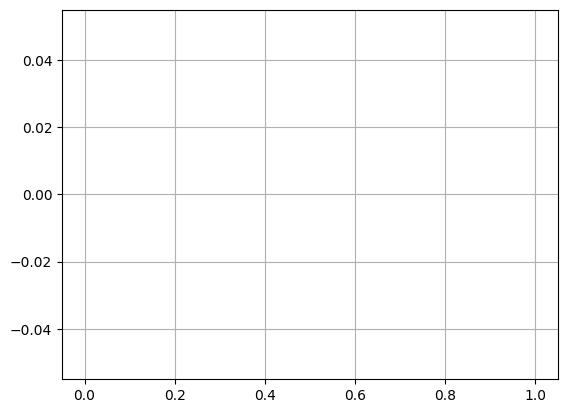

In [4]:
make_consistent_title(frac=0.0001)

In [5]:

iter0_old_movie = pd.read_pickle('old_title.pkl').loc[:, old_columns]
iter0_new_movie = pd.read_pickle('new_title.pkl').loc[:, new_columns]
iter1_merged = pd.read_pickle('iter1_merged_title.pkl')

In [9]:
iter0_old_movie_xr = iter0_old_movie.to_xarray()
iter0_new_movie_xr = iter0_new_movie.to_xarray()
iter1_merged_xr = iter1_merged.to_xarray()

In [13]:
iter0_old_movie

,title,year
0,Cristián Campos,2010.0
1,Life & Death,2013.0
2,Disguise for Murder,2001.0
3,Anniversary,1971.0
4,Angus Black/Lester Barrie/DC Curry,2009.0
...,...,...
2545526,Banged Up,NaN
2545527,(#3.4),NaN
2545528,Celebrity Special 2,NaN
2545529,"Alas Poor Hippies, Love is Dead",NaN


In [14]:
iter0_old_movie_xr

<xarray.Dataset>
Dimensions:  (index: 2545531)
Coordinates:
  * index    (index) int64 0 1 2 3 4 ... 2545526 2545527 2545528 2545529 2545530
Data variables:
    title    (index) object 'Cristián Campos' ... "Tomorrow's Youth"
    year     (index) float64 2.01e+03 2.013e+03 2.001e+03 ... nan nan 1.935e+03

In [18]:
iter0_new_movie_xr

<xarray.Dataset>
Dimensions:    (index: 11578183)
Coordinates:
  * index      (index) int64 0 1 2 3 4 ... 11578179 11578180 11578181 11578182
Data variables:
    titleId    (index) object 'tt0000001' 'tt0000001' ... 'tt9916880'
    title      (index) object 'Carmencita' ... 'Horrid Henry Knows It All'
    year       (index) object '1894' '1894' '1894' ... '2015' '2015' '2014'
    region     (index) object 'DE' 'US' '\\N' '\\N' 'FR' ... nan 'DE' '\\N' nan
    titleType  (index) object 'short' 'short' 'short' ... 'short' 'tvEpisode'

In [19]:
iter1_merged_xr

<xarray.Dataset>
Dimensions:    (index: 1193)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 ... 1187 1188 1189 1190 1191 1192
Data variables:
    old_id     (index) object 'OLD1932150' 'OLD2223598' 'OLD1346204' ... nan nan
    title      (index) object 'Fenêtre sur femmes' ... 'Episode #9.215'
    year       (index) int64 1992 1972 1956 2009 1982 ... 2008 2010 2018 2000
    titleId    (index) object nan nan nan ... 'tt9500470' 'tt12584708'
    region     (index) object nan nan nan nan nan nan ... 'MX' nan 'CH' nan nan
    titleType  (index) object nan nan nan ... 'movie' 'tvEpisode' 'tvEpisode'

advantage of grouping dataset (labeled multidim array): module, ccom

In [ ]:

# dimensions are names describing what each axis is representing and coords are data related to datavariables, e.g. it could contain similar named object as some dim
# If dim is not found in coords its values are range(0,n)
# coords can also contain other (meta)data than dim info
output_format = dict(
    iter0_om=["index"],
    iter0_nm =["index"],
    iter1 = ["index"],
    log_likelihood={
        "loglik": "loglik"
    },
    coords={
        "year": [n for n in range(precision['N'])],
        "movie": setting['target_simulated_vector_names'],
        "region": [r for r in range(precision['R'])]
    },
    dims={
        'person': ["name", "year"],
        'movie': ["title", "year"],
        'character': ["movie", "person"],
    }
)

In [17]:
iter0_old_movie_id =  az.convert_to_inference_data(iter0_old_movie_xr)

TypeError: convert_to_inference_data() missing 1 required positional argument: 'obj'

In [16]:
iter0_old_movie_id

Inference data with groups:
	> posterior

# iter0: file directory

#iter1: opt-out selection

#iter2: opt-in selection
- reference functions from iter0, iter2

discussion:

  - list of verification check? currently, three checkpoints (after iter1-weak_sel, after join, after iter2-strong_sel)
  - list of validation check? (are we building the right product)
 ```
 def compare_mental_material(df, iter, is_old=True): #TODO make this as writelines()
    if iter ==0:
        if is_old:
            print("###### ITER0 COMPLETE\n", df)
        else:
            print(df)
    elif iter == 1:
        print("###### ITER1 COMPLETE")
        print("from merged table, only old's `titleId` is na, only new's `old_id`is na", df)
        print("rows with titleId should include nonenglish term\n", df)
    elif iter == 2:
        print("###### ITER2 COMPLETE\n")
        print("new_movie deleted na year and include nonmovie type and non us region, nonenglish titiles", df)
 ```


In [3]:
set_dir_moviedata()
print(os.getcwd())

/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/data/movie


In [6]:
old_columns = ['title', 'year']
new_columns = ['titleId', 'title', 'year', 'region', 'titleType']
iter0_old_movie = pd.read_pickle('old_title.pkl').loc[:, old_columns]
iter0_new_movie = pd.read_pickle('new_title.pkl').loc[:, new_columns]

iter1_merged = pd.read_csv('iter1_merged_title.tsv', sep = '\t')

In [15]:
orphan = ['Ajeossi', 'On the edge of even', 'A day of violence', 'About my father']
for o in orphan:
    print(o, "is in old is", any(iter0_old_movie.title.isin([o])))

Ajeossi is in old is True
On the edge of even is in old is False
A day of violence is in old is False
About my father is in old is False


In [19]:
iter1_merged = merged_iter1

In [17]:
for o in orphan:
    print(o, "is in old is", any(iter1_merged.title.isin([o])))

Ajeossi is in old is True
On the edge of even is in old is False
A day of violence is in old is False
About my father is in old is False


In [18]:
merged_iter1[mergtitle, 'Ajeossi')

ValueError: either both or neither of x and y should be given

ITER0 COMPLETE Empty DataFrame
Columns: [title, year]
Index: [] Empty DataFrame
Columns: [titleId, title, year, region, titleType]
Index: []
###### ITER0 COMPLETE
 Empty DataFrame
Columns: [title, year]
Index: []
Empty DataFrame
Columns: [titleId, title, year, region, titleType]
Index: []
###### ITER1 COMPLETE
from merged table, only old's `titleId` is na, only new's `old_id`is na Empty DataFrame
Columns: [titleId, title, year, region, titleType]
Index: []
rows with titleId should include nonenglish term
 Empty DataFrame
Columns: [titleId, title, year, region, titleType]
Index: []
###### ITER2 COMPLETE

new_movie deleted na year and include nonmovie type and non us region, nonenglish titiles Empty DataFrame
Columns: [index, old_id, titleId, title, year, region, titleType, soft_eng]
Index: []
1990


Empty DataFrame
Columns: [index, old_id, titleId, title, year, region, titleType, soft_eng]
Index: []
1984


Empty DataFrame
Columns: [index, old_id, titleId, title, year, region, titleType,

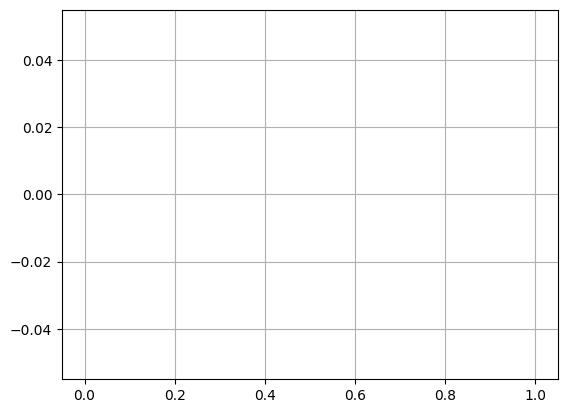

In [5]:
#set_dir_moviedata()
make_consistent_title(IS_PKL = False, IS_SAVE= False,  frac =0)
# ITER0: DATA READ, CLEANING
#old: [2,545,531 rows x 2 columns]
#new: [11,578,183 rows x 5 columns]

# ITER1: PASSIVE SELECT (OPT OUT) ROWS
# remove titles = final, pilot, na / including # or '-0' or '-1'/
# outermerge: 8m row, 7 col

# ITER 2: ACTIVE SELECT (OPT IN) ROWS: INFER title is ENG or then select ENG
# remove titles: df['soft_eng'] = df.title.apply(lambda x: is_english(x))
#merged_title_eng_us_movie 50k

#ITER 3: INSPECT OLD\NEW
# remove titles: df['strong_eng'] = df.title.apply(lambda x: detect(x)) #"Anajigoku" pass iter2, fail iter3 (sw)
#none

In [11]:
old = pd.read_pickle("old_title.pkl")
old[old.year == 2006]

,id,title,imdbIndex,kindID,year,imdbID,phoneticCode,episodeOfID,seasonNr,episodeNr,seriesYears,md5sum
48,61223,Blutsbande,NaN,7,2006.0,NaN,B4321,61221.0,1.0,7.0,NaN,f26233762bac22bbe9d74be23a88cd6b
52,70637,(2006-09-23),NaN,7,2006.0,NaN,NaN,70604.0,NaN,NaN,NaN,88fb8fedde3a88d4b3cd60ec21c326dc
60,25925,Winter,NaN,7,2006.0,NaN,W536,25921.0,1.0,4.0,NaN,97829ebf2636f60a323a4cc647fe5c0f
87,57702,(#1.9305),NaN,7,2006.0,NaN,NaN,56199.0,1.0,9305.0,NaN,c23e10d30fc4f417387e039ed3677817
115,77848,Amor sin condiciones,NaN,2,2006.0,NaN,A5625,NaN,NaN,NaN,2006-????,c00851c02970653ac10ab8dc5454fc96
...,...,...,...,...,...,...,...,...,...,...,...,...
2544773,2544624,Marple: The Moving Finger,NaN,3,2006.0,NaN,M6143,NaN,NaN,NaN,NaN,574894d2a39d2109f7a5589f3ed7e4a9
2544819,2544620,Marple: By the Pricking of My Thumbs,NaN,3,2006.0,NaN,M6141,NaN,NaN,NaN,NaN,f4057f81fd3005f9d271224a3c5f35e0
2544923,2545259,Three Men in a Boat,NaN,3,2006.0,NaN,T6513,NaN,NaN,NaN,NaN,7369adef21ea55cf415fcb390605fb2f
2545037,2545195,The Runt,NaN,1,2006.0,NaN,R53,NaN,NaN,NaN,NaN,03da13ba69baf3f3096605ff90d596c2


In [6]:
merged_title_iter1 = pd.read_pickle("merged_title_iter1.pkl")
merged_title_iter1.shape[0]

8203504

In [7]:
mo_eng_us_movie = sel_region_type(sel_title(merged_title_iter1, 1, characters = ['Pilot', 'Finale'])) # 169k -> 65879
mo_eng_us_movie.shape[0]

65879

In [10]:
mo_eng_us_movie[mo_eng_us_movie.year ==2006]

,index,old_id,title,year,titleId,region,titleType
903,903,OLD2134303,Notes on Marie Menken,2006,tt0927629,US,movie
6220,6220,OLD2141347,Manufactured Landscapes,2006,tt0832903,US,movie
8696,8696,OLD2018144,Jam,2006,tt0482528,US,movie
11216,11216,OLD1909190,Ghost on the Highway: A Portrait of Jeffrey Le...,2006,tt1082834,US,movie
12692,12692,OLD2245850,Pop,2006,tt1567666,US,movie
...,...,...,...,...,...,...,...
7655045,7655045,NaN,For Sale by Owner,2006,tt0762096,US,movie
7663486,7663486,NaN,Tales from the Players Manual - Volume 1,2006,tt11432972,US,movie
7778882,7778882,NaN,The Hidden Battle,2006,tt7350556,US,movie
7971144,7971144,NaN,Adult Stem Cells and Regeneration,2006,tt5734126,US,movie


In [22]:
mo_eng_us_movie[mo_eng_us_movie.titleId.isnull()]

,index,old_id,title,year,titleId,region,titleType


In [8]:
merged_title_eng_us_movie = pd.read_pickle('merged_title_eng_us_movie.pkl')
merged_title_eng_us_movie

,index,old_id,title,year,titleId,region,titleType,soft_eng
16,16,OLD2439135,The Man Behind the Door,1914,tt0005692,US,movie,True
19,19,OLD2209006,Safe House,1999,tt0183734,US,movie,True
76,76,OLD1885719,Diary of a Co-Worker,2005,tt0490892,US,movie,True
151,151,OLD2479214,The Red Lane,1920,tt0011616,US,movie,True
247,247,OLD2176487,Love from Paris,1970,tt0143480,US,movie,True
...,...,...,...,...,...,...,...,...
8199397,8199397,NaN,Marathon Mindset,2022,tt19398512,US,movie,True
8199548,8199548,NaN,Lady Hyde,2022,tt21001736,US,movie,True
8199889,8199889,NaN,The Girlfriend Project,2022,tt6385442,US,movie,True
8202123,8202123,NaN,Bundles the Movie,2022,tt21854866,US,movie,True


new\old movies

In [12]:
new_not_old = mo_eng_us_movie[mo_eng_us_movie.old_id.isnull()]
new_not_old

,index,old_id,title,year,titleId,region,titleType
1814411,1814411,NaN,For the Birds,2016,tt6017950,US,movie
1814414,1814414,NaN,The Arab Americans,2015,tt2369365,US,movie
1814559,1814559,NaN,Valerian and the City of a Thousand Planets,2017,tt2239822,US,movie
1814713,1814713,NaN,Love of a Lifetime,2017,tt4478324,US,movie
1817523,1817523,NaN,The Callback,2021,tt13539840,US,movie
...,...,...,...,...,...,...,...
8199548,8199548,NaN,Lady Hyde,2022,tt21001736,US,movie
8199889,8199889,NaN,The Girlfriend Project,2022,tt6385442,US,movie
8200049,8200049,NaN,One Cent Can't Change,2022,tt18311364,US,movie
8202123,8202123,NaN,Bundles the Movie,2022,tt21854866,US,movie


In [9]:
new_not_old.year.hist()

NameError: name 'new_not_old' is not defined